In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download zip file
!kaggle datasets download -d burak3ergun/loan-data-set
!unzip loan-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/burak3ergun/loan-data-set
License(s): unknown
  0% 0.00/7.80k [00:00<?, ?B/s]
100% 7.80k/7.80k [00:00<00:00, 8.82MB/s]
Archive:  loan-data-set.zip
  inflating: loan_data_set.csv       


## Read Data Set

In [3]:
df = pd.read_csv(r'loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Description

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Describe data also include


In [6]:
df.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Column : 'Loanstatus' total value

In [7]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Checking Nulls

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Two Types of Data
*   Categorical
*   Numerical


In [9]:
# fill null categorical with mode and numerical with mean

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outlier Detection

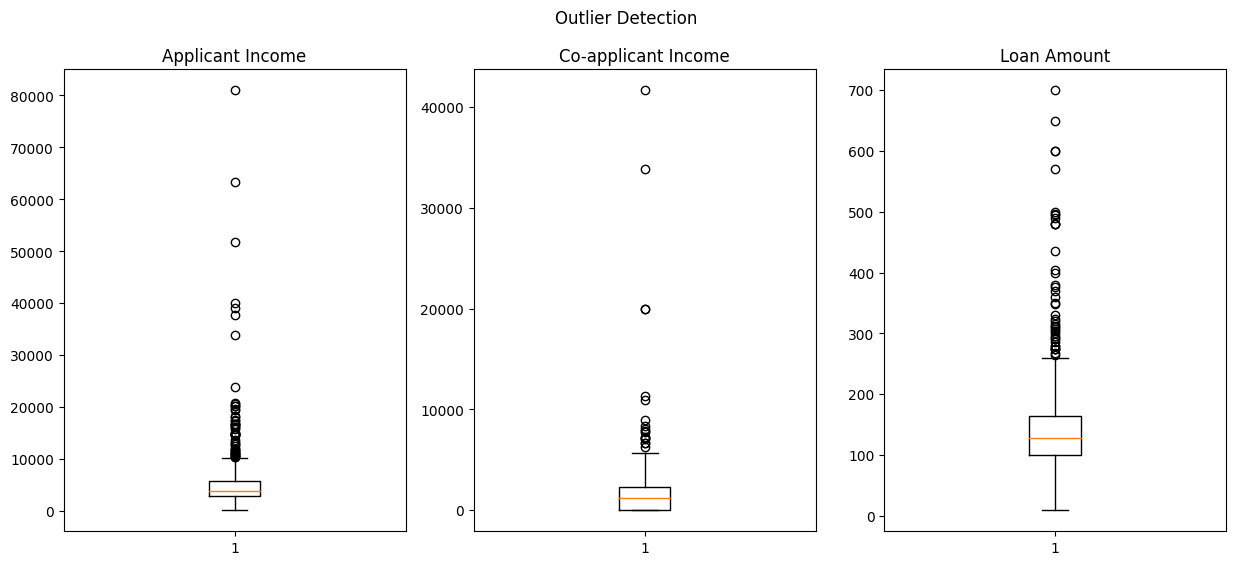

In [10]:
# Box plot for outlier detection applicant income, co-applicant income and loan amount

plt.figure(figsize=(15, 6))
# Boxplots for applicant income
plt.subplot(1, 3, 1)
plt.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income')

# Boxplots for co-applicant income
plt.subplot(1, 3, 2)
plt.boxplot(df['CoapplicantIncome'])
plt.title('Co-applicant Income')

# Boxplots for loan amount
plt.subplot(1, 3, 3)
plt.boxplot(df['LoanAmount'])
plt.title('Loan Amount')

plt.suptitle('Outlier Detection')
plt.show()

## Remove Outliers

In [11]:
# Remove outliers ApplicantIncome
print("Before Removing The Outlier :",df.shape)
df = df[df['ApplicantIncome']< 25000]
print("After Removing The Outlier :",df.shape)

Before Removing The Outlier : (614, 13)
After Removing The Outlier : (607, 13)


In [12]:
# Remove outliers CoapplicantIncome
print("Before Removing The Outlier :",df.shape)
df = df[df['CoapplicantIncome']< 12000]
print("After Removing The Outlier :",df.shape)

Before Removing The Outlier : (607, 13)
After Removing The Outlier : (603, 13)


In [13]:
# Remove outliers LoanAmount
print("Before Removing The Outlier :",df.shape)
df = df[df['LoanAmount']< 400]
print("After Removing The Outlier :",df.shape)

Before Removing The Outlier : (603, 13)
After Removing The Outlier : (591, 13)


## Feature Engineering

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
## Add Total_Incime Column and drop coapplicant income
df['Total_Income'] =df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

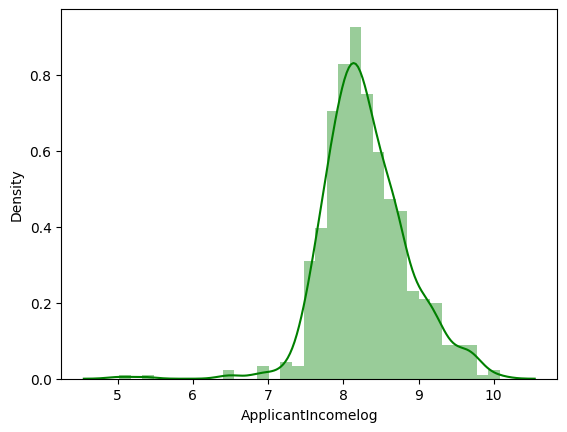

In [16]:
# Apply log transformation to 'ApplicantIncome' column
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'], color='green')

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

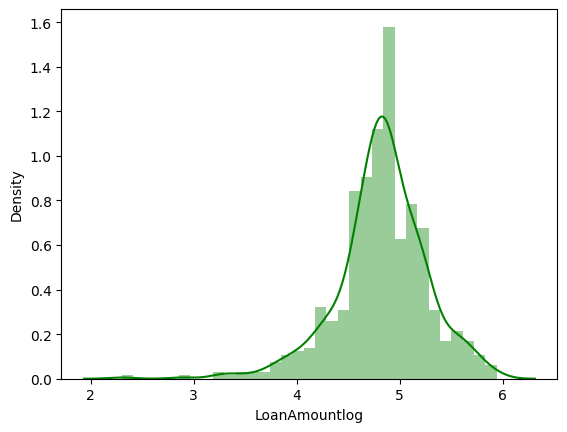

In [17]:
# Apply log transformation to 'LoanAmount' column
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'], color='green')


<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

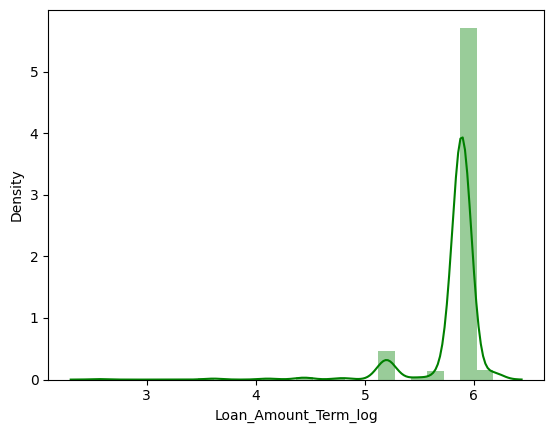

In [18]:
# Apply log transformation to 'Loan_Amount_Term' column
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'], color='green')

<Axes: xlabel='Total_Income_log', ylabel='Density'>

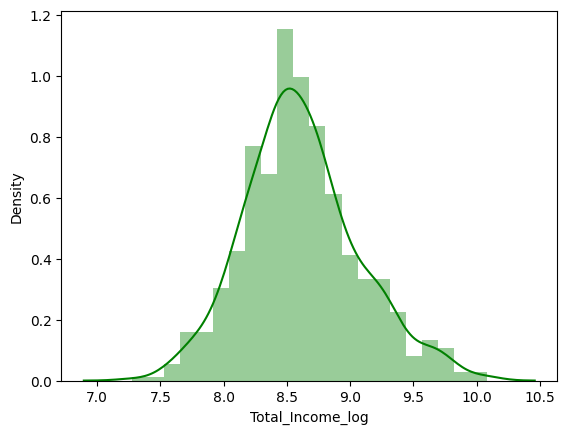

In [19]:
# Apply log transformation to 'Loan_Amount_Term' column
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'], color='green')

In [20]:
# Define the list of column names to drop
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID']

# Drop the specified columns
df = df.drop(columns=cols)

# Display the DataFrame after dropping columns
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## Loan Status across differnet Columns


In [21]:
# Sperate Numerical Data From Categorical Data

# Numerical Data
num = df.select_dtypes('number').columns.tolist()
print("Numerical Data :", num)

# Categorical Data
cat = df.select_dtypes('object').columns.tolist()
print("Categorical Data :",cat)


Numerical Data : ['Credit_History', 'ApplicantIncomelog', 'LoanAmountlog', 'Loan_Amount_Term_log', 'Total_Income_log']
Categorical Data : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


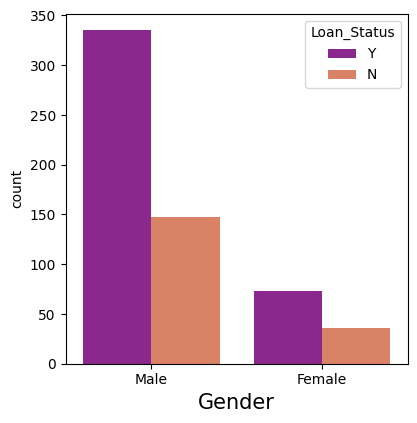

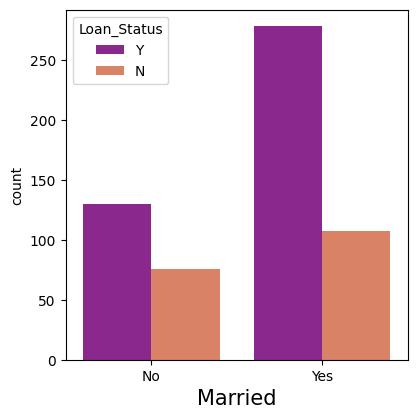

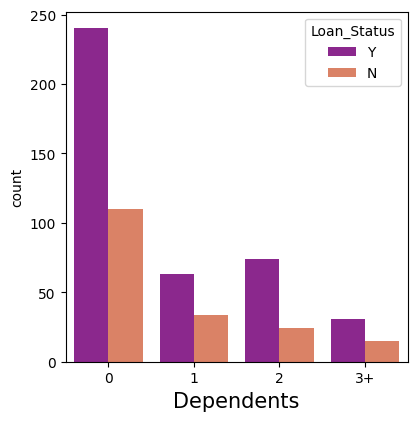

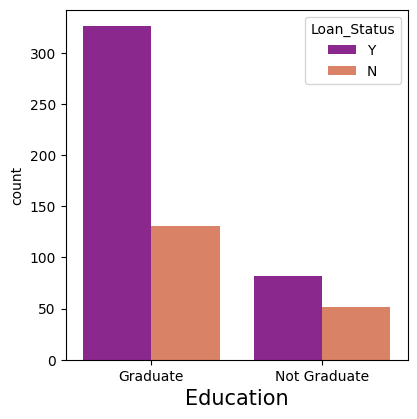

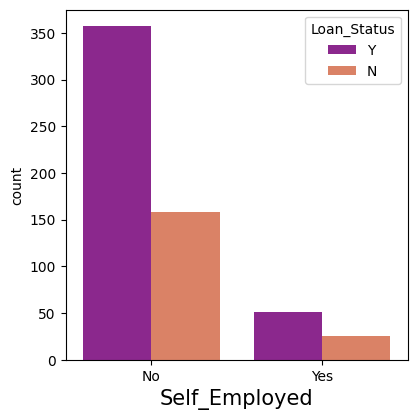

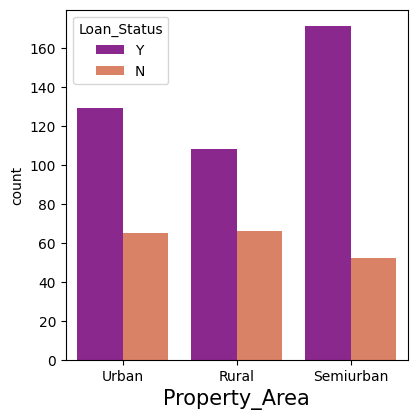

In [22]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Loan_Status', data=df, palette='plasma')
    plt.xlabel(i, fontsize = 15)


## Crosstab

In [23]:
# plot cat dat w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [24]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [25]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [26]:
# plot cat data w.r.t Target Data
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


## Data Encoding

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [28]:
## Label Encoding Because we have less category in a each column
df['Gender'] = df['Gender'].replace({'Male' :1,'Female':0})
df['Married'] = df['Married'].replace({'Yes' :1,'No':0})
df['Education'] = df['Education'].replace({'Graduate' :1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes' :1,'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y' :1,'N':0})


In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,1,0,1.0,Urban,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,1,0,1.0,Rural,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1,1.0,Urban,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,0,1.0,Urban,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,1,0,1.0,Urban,1,8.699681,4.955827,5.888878,8.699681


Here we replace urban and semiurban with 1 AND rural with 0 same for dependent column

In [30]:
df['Property_Area'] = df['Property_Area'].replace({'Urban' :1,'Rural':0,'Semiurban':1})
df['Dependents'] = df['Dependents'].replace({'0':0,'1' :1,'2':1,'3+':1})


In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,1,0,1.0,1,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,1,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1,1.0,1,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,0,1.0,1,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,1,0,1.0,1,1,8.699681,4.955827,5.888878,8.699681


In [32]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

## Correlation Matrix


In [33]:
## Correlation (Depencencies)
corr = df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
Gender,1.000000,0.375442,0.163782,-0.049117,0.000221,0.014089,-0.077452,0.021219,0.063621,0.160187,-0.061820,0.183689
Married,0.375442,1.000000,0.346859,-0.014478,-0.005402,0.020379,0.010520,0.093799,-0.017218,0.179100,-0.068582,0.174629
Dependents,0.163782,0.346859,1.000000,-0.044051,0.082373,-0.009087,0.044982,0.012097,0.113465,0.131153,-0.090063,0.084113
Education,-0.049117,-0.014478,-0.044051,1.000000,0.002798,0.074499,0.075790,0.091839,0.170130,0.118417,0.064553,0.181886
Self_Employed,0.000221,-0.005402,0.082373,0.002798,1.000000,-0.013486,-0.018014,-0.016038,0.205077,0.093445,-0.040056,0.186070
Credit_History,0.014089,0.020379,-0.009087,0.074499,-0.013486,1.000000,0.017689,0.553909,0.029060,-0.015774,-0.022457,0.031989
Property_Area,-0.077452,0.010520,0.044982,0.075790,-0.018014,0.017689,1.000000,0.097332,-0.026422,-0.095809,-0.043634,-0.084807
Loan_Status,0.021219,0.093799,0.012097,0.091839,-0.016038,0.553909,0.097332,1.000000,-0.004300,-0.034425,-0.007591,0.038686
ApplicantIncomelog,0.063621,-0.017218,0.113465,0.170130,0.205077,0.029060,-0.026422,-0.004300,1.000000,0.417378,-0.022237,0.748624
LoanAmountlog,0.160187,0.179100,0.131153,0.118417,0.093445,-0.015774,-0.095809,-0.034425,0.417378,1.000000,0.102557,0.617827


<Axes: >

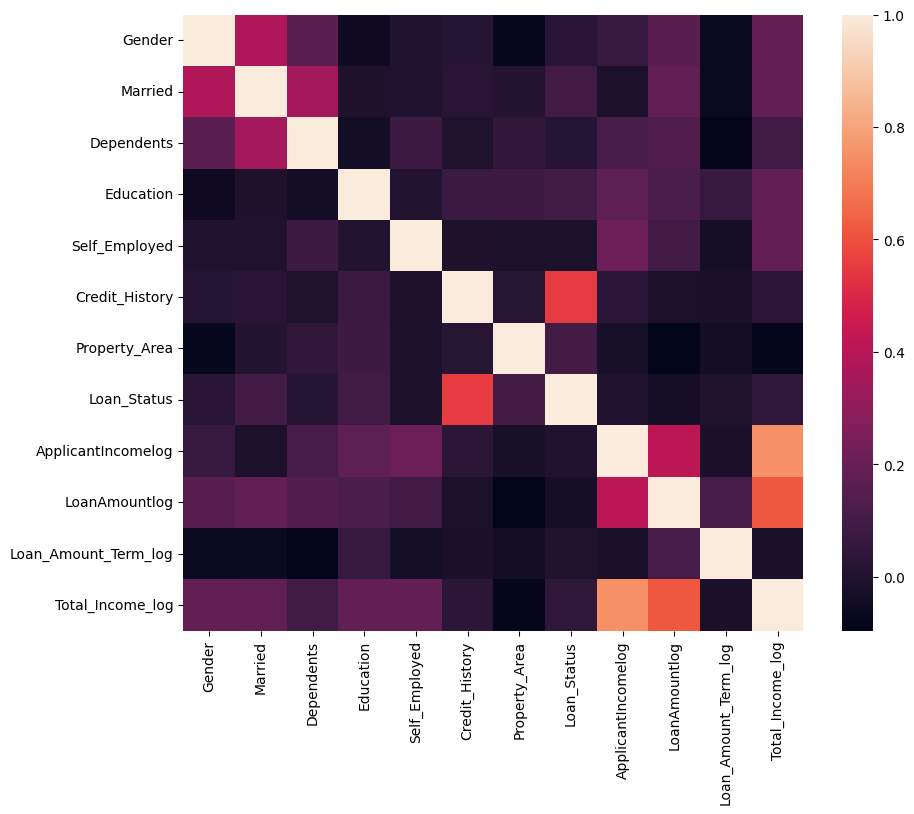

In [34]:
# Plot correlation matrix as heatmap
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,)

<Axes: >

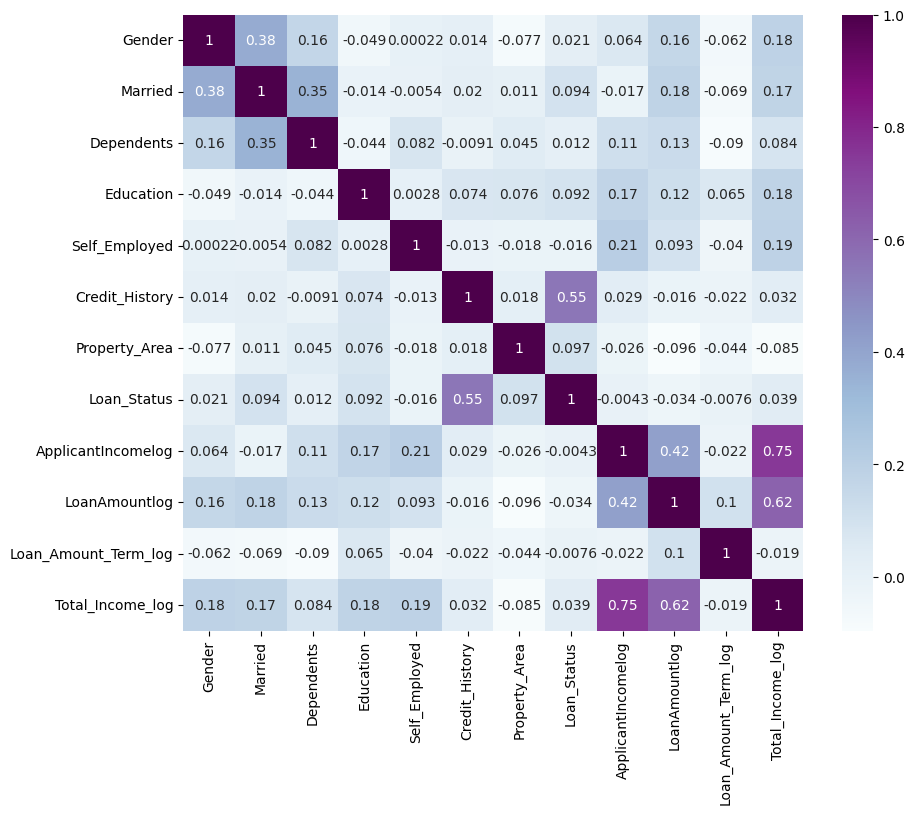

In [35]:
# Plot correlation matrix as heatmap
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="BuPu")

## Split data into Dependent and Independent

In [36]:
# Independents variable
X = df.drop(['Loan_Status'], axis =1)
# Dependent variable
y = df['Loan_Status']

In [37]:
# x column names
print("X columns are :",X.columns)

X columns are : Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'ApplicantIncomelog',
       'LoanAmountlog', 'Loan_Amount_Term_log', 'Total_Income_log'],
      dtype='object')


In [38]:
## X columns
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,1,0,1.0,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,1,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,1,1,1.0,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,0,0,1.0,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,1,0,1.0,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,1,1,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,1,0,1.0,1,8.996280,5.537334,5.888878,9.025576
612,1,1,1,1,0,1.0,1,8.933796,5.236442,5.888878,8.933796


In [39]:
# Loan status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

In [40]:
X.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
609,0,0,0,1,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,1,1,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,1,0,1.0,1,8.996280,5.537334,5.888878,9.025576
612,1,1,1,1,0,1.0,1,8.933796,5.236442,5.888878,8.933796
613,0,0,0,1,1,0.0,1,8.430327,4.897840,5.888878,8.430327


Implement Machine Learning Model

In [41]:
## Import important libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression



## Split data into training and testing sets

In [42]:
# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression Model

In [43]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8067226890756303


In [46]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 [[14 22]
 [ 1 82]]


In [47]:
# Classification Report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.39      0.55        36
           1       0.79      0.99      0.88        83

    accuracy                           0.81       119
   macro avg       0.86      0.69      0.71       119
weighted avg       0.83      0.81      0.78       119



In [48]:
import pandas as pd
# Get user input for various features
gender = int(input("Enter your gender (1 for Male, 0 for Female): "))
married = int(input("Enter your marital status (1 for Married, 0 for Unmarried): "))
dependents = int(input("Enter the number of dependents: "))
education = int(input("Enter your education level (1 for Graduate, 0 for Not Graduate): "))
self_employed = int(input("Enter your employment status (1 for Self-Employed, 0 for Salaried): "))
applicant_income = float(input("Enter your income: "))
coapplicant_income = float(input("Enter your co-applicant's income: "))
loan_amount = float(input("Enter the loan amount: "))
loan_amount_term = float(input("Enter the loan term in months: "))
credit_history = int(input("Enter your credit history (1 for Yes, 0 for No): "))
property_area = int(input("Enter your property area (1 for Urban, 0 for Rural & Semiurban): "))

# Create a new data point with user input
new_data_point = [gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area]

# Convert the new data point to a DataFrame
new_data_df = pd.DataFrame([new_data_point], columns=X.columns)

# Predict the loan status for the new data point
predicted_status = model.predict(new_data_df)[0]

# Print the predicted loan status
if predicted_status == 1:
    print("Loan application is likely to be approved.")
else:
    print("Loan application is likely to be rejected.")


Enter your gender (1 for Male, 0 for Female): 0
Enter your marital status (1 for Married, 0 for Unmarried): 1
Enter the number of dependents: 1
Enter your education level (1 for Graduate, 0 for Not Graduate): 0
Enter your employment status (1 for Self-Employed, 0 for Salaried): 0
Enter your income: 0
Enter your co-applicant's income: 1
Enter the loan amount: 20000
Enter the loan term in months: 1
Enter your credit history (1 for Yes, 0 for No): 0
Enter your property area (1 for Urban, 0 for Rural, 2 for Semiurban): 1
Loan application is likely to be rejected.
